# Pymaceuticals Inc.
---

### Analysis

- Per the summary statistics table on tumor volume, both Capomulin and Ramicane appear the most effective in reducing tumor size and have similar metrics across the board. 
- Of the four drug regimens tested, only Infubinol is noted to contain an outlier in tumor volume based on statistical analysis.
- Per the correlation analysis, mouse weight and average tumor size are highly positively correlated with a Pearson coefficient of 0.84. This suggests that more overweight mice exhibit larger tumors.
 

In [1]:
PATH = "C:/Users/Danqest/Desktop/CODING/GT-VIRT-DATA-PT-01-2023-U-LOLC/05 - Data Visualization Using Matplotlib Unit/Module 05 Challenge - Due 02-28-2023/matplotlib_challenge/Pymaceuticals/"

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = PATH+"data/Mouse_metadata.csv"
study_results_path = PATH+"data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [3]:
# Checking the number of mice.
study_data_complete["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data_complete[study_data_complete.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data_complete[study_data_complete['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete = study_data_complete[study_data_complete['Mouse ID'] != "g989"]
# study_data_complete.to_csv(PATH+"study_data_complete.csv")
study_data_complete.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [7]:
# Checking the number of mice in the clean DataFrame.
study_data_complete["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = study_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume = study_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumor_volume = study_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev_tumor_volume = study_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
stderr_tumor_volume = study_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

regimen_summary = {
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": stddev_tumor_volume,
    "Tumor Volume Std. Err.": stderr_tumor_volume
}

regimen_summary = pd.DataFrame(data=regimen_summary)
regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
regimen_summary = study_data_complete.groupby(["Drug Regimen"]).agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
regimen_summary

C:\Users\Danqest\AppData\Local\Temp\ipykernel_19104\2939133266.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  regimen_summary = study_data_complete.groupby(["Drug Regimen"]).agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

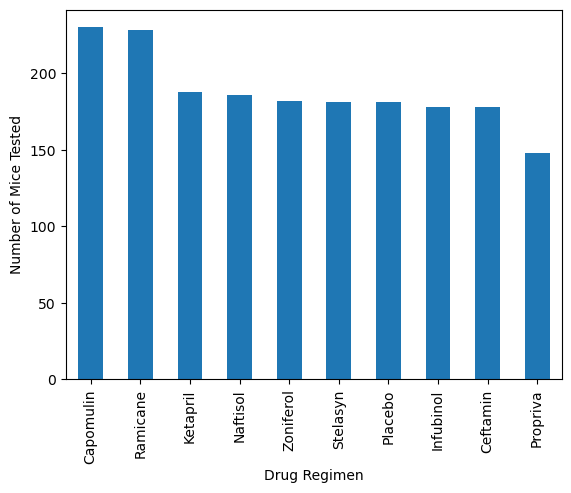

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

ax = study_data_complete["Drug Regimen"].value_counts().plot.bar()
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Mice Tested")

In [11]:
study_data_complete.groupby(["Drug Regimen"])['Timepoint'].count().sort_values(ascending=False)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

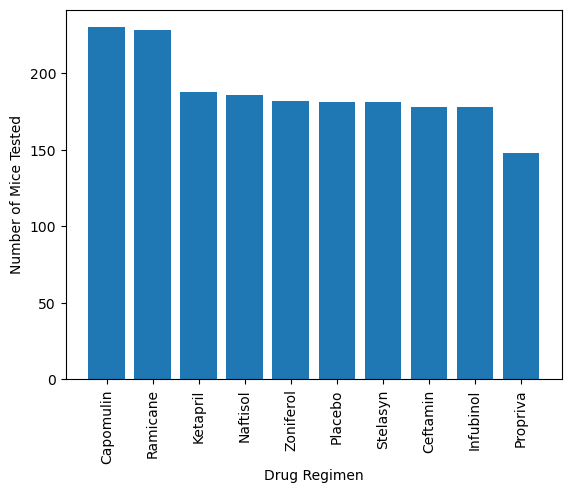

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
ax = study_data_complete.groupby(["Drug Regimen"])['Timepoint'].count().sort_values(ascending=False).index
ay = study_data_complete.groupby(["Drug Regimen"])['Timepoint'].count().sort_values(ascending=False)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.bar(ax, ay);

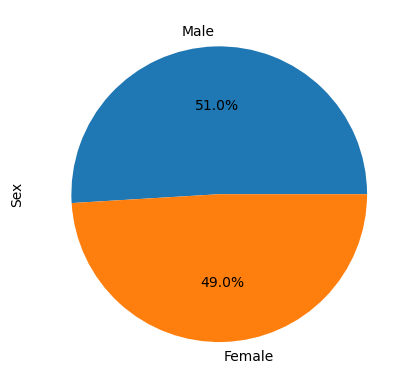

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

ax = study_data_complete["Sex"].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_ylabel("Sex");

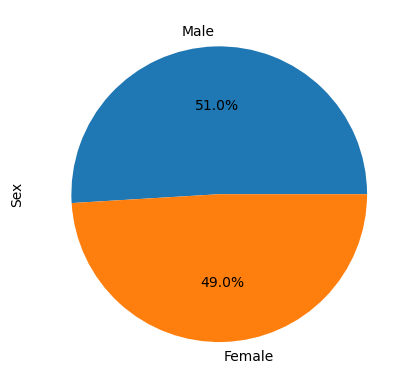

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
ax = study_data_complete["Sex"].value_counts()
plt.ylabel("Sex")
plt.pie(ax, labels=["Male", "Female"], autopct='%1.1f%%');

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

terminal_timepoint = study_data_complete[study_data_complete["Drug Regimen"].isin(drug_list)]


# terminal_timepoint = study_data_complete[study_data_complete["Timepoint"]==study_data_complete["Timepoint"].max()]
# terminal_timepoint = terminal_timepoint[terminal_timepoint["Drug Regimen"].isin(drug_list)]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
terminal_timepoint = terminal_timepoint.drop_duplicates(subset=["Mouse ID"], keep="last")
# terminal_timepoint.to_csv(PATH+"terminal_timepoint.csv")
terminal_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
182,u153,0,45.000000,0,Ceftamin,Female,11,25
194,b447,0,45.000000,0,Ceftamin,Male,2,30
217,x226,0,45.000000,0,Ceftamin,Male,23,28
222,t573,0,45.000000,0,Ceftamin,Female,15,27
420,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_plot_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    filtered_data = terminal_timepoint[terminal_timepoint["Drug Regimen"] == drug]
    quartiles = filtered_data.quantile([.25,.5,.75])["Tumor Volume (mm3)"]
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_data = filtered_data[(filtered_data["Tumor Volume (mm3)"] < lower_bound) | (filtered_data["Tumor Volume (mm3)"] > upper_bound)]
    outlier_data = outlier_data["Tumor Volume (mm3)"].values
    
    print(f"{drug}")
    print(f"Lower Quartile: {lowerq}, Upper Quartile: {upperq}, IQR: {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    if outlier_data.size == 0:
        print(f"{drug} has no detected potential outliers.")
    else:
        print(f"{drug}'s potential Tumor Volume outliers: {outlier_data}'")
    print("- - -")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    tumor_plot_data.append(filtered_data["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    

Capomulin
Lower Quartile: 32.37735684, Upper Quartile: 40.1592203, IQR: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin has no detected potential outliers.
- - -
Ramicane
Lower Quartile: 31.56046955, Upper Quartile: 40.65900627, IQR: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane has no detected potential outliers.
- - -
Infubinol
Lower Quartile: 54.04860769, Upper Quartile: 65.52574285, IQR: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol's potential Tumor Volume outliers: [36.3213458]'
- - -
Ceftamin
Lower Quartile: 48.72207785, Upper Quartile: 64.29983003, IQR: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Ceftamin has no detected potential outliers.
- - -


C:\Users\Danqest\AppData\Local\Temp\ipykernel_19104\3455070363.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_list)


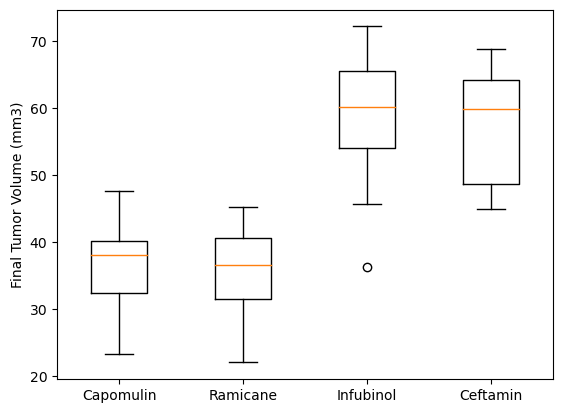

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_xticklabels(drug_list)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_plot_data)
plt.show();

## Line and Scatter Plots

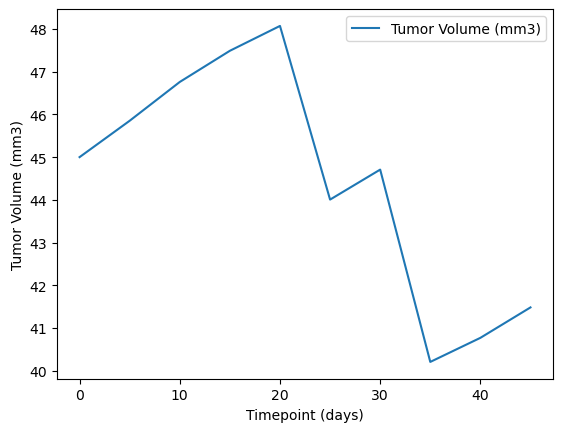

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

ax = study_data_complete[study_data_complete["Mouse ID"] == "l509"].plot.line("Timepoint", "Tumor Volume (mm3)")
ax.set_xlabel("Timepoint (days)")
ax.set_ylabel("Tumor Volume (mm3)");

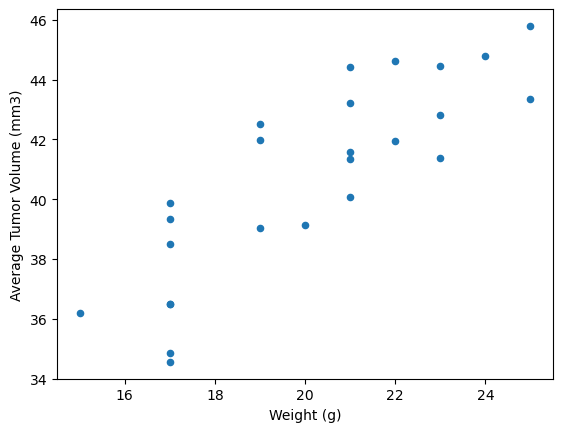

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
filtered_data = study_data_complete[study_data_complete["Drug Regimen"] == "Capomulin"]
averaged_tumor_size = filtered_data.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

merged_tumor_data = pd.merge(averaged_tumor_size, study_data_complete, how="left", on=["Mouse ID", "Mouse ID"])
merged_tumor_data = merged_tumor_data.drop_duplicates(subset=["Mouse ID"], keep="last")
ax = merged_tumor_data.plot.scatter("Weight (g)", "Tumor Volume (mm3)_x")
ax.set_ylabel("Average Tumor Volume (mm3)");

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694719


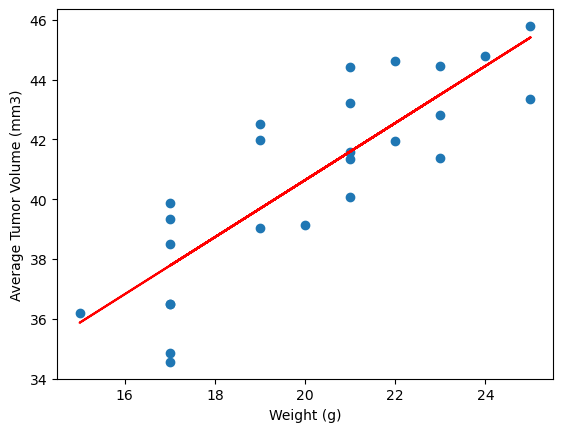

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = merged_tumor_data["Weight (g)"]
y_values = merged_tumor_data["Tumor Volume (mm3)_x"]

corr = st.pearsonr(x_values, y_values)
corr = corr.statistic
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)");
plt.ylabel("Average Tumor Volume (mm3)");
plt.plot(x_values,regress_values,"r-");